In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# <h1>Intro:</h1>

So for my midterm, I shall be looking into Merge and Insertion sort. Both are very well understood, quite intuitive, but serve different purposes as to where they are implemented. 

Tech specs:
    OS: Elementry/Debian
    Language: Python 2.7
    Package: iPython
    Text Editor: Sublime 2
    
Anyway, onto the sorts.
    

# Merge Sort:

Merge sort is a fast, more modern sort used on any size of collections. It relies on recursive calls which I will get further into in a minute. Here is the code.

In [25]:
"""
mergesort.py 

    Part of my Mid-term

Logan Davis | Febuary 27th
"""
def mergesort(array):
    """
    This function merge sorts an array.
    Arguments (1):
        array = the list you with to have sorted.
    Returns (1):
        it returns a sorted version of array.
    ----------------------------------------------
    EXAMPLE:
    >>> array = [3,6,5,8,2,4556]
    >>> mergesort(array)
    [2,3,5,6,8,4556]
    """
    #########################
    # The current version is 
    # memory hungery. I will 
    # try to optimize it 
    # shortly. Needs more
    # testing as well.
    #########################
    length = len(array)
    index_right,index_left,max_right,max_left = 0,0,0,0
    merged = False
    sorted_list = []
    if length <= 1:
        return array
    else:
        midpoint = length/2
        rightside = mergesort(array[midpoint:])
        leftside = mergesort(array[:midpoint])
        max_left = (len(leftside))
        max_right = (len(rightside))
        while not merged:
            if index_left != max_left and index_right != max_right:
                if leftside[index_left] < rightside[index_right]:
                    sorted_list.append((leftside[index_left]))
                    index_left += 1
                elif rightside[index_right] < leftside[index_left]:
                    sorted_list.append((rightside[index_right]))
                    index_right += 1
                elif leftside[index_left] == rightside[index_right]:
                    sorted_list.append(rightside[index_right])
                    sorted_list.append(leftside[index_left])
                    index_right += 1
                    index_left += 1
            elif index_left == max_left and index_right != max_right:
                sorted_list.append(rightside[index_right])
                index_right += 1
            elif index_left != max_left and index_right == max_right:
                sorted_list.append(leftside[index_left])
                index_left += 1
            else:
                merged = True
        return sorted_list

<h5> The Basic Idea </h5>
So the basic step process of a merge sort is as follows:
    1.find middle of collection to sort.
    2.cut the collection in two halves.
    3.call merge sort on each half unless the halfs are just one item long (base case)
    4.recombine the two halfs in order by looking at the first item in each half and choosing the smaller of the two
    until both halves are empty.
    
This is a divide and conquer strategy of sorting. By breaking down the lists into many sorted parts (one item, already sorted), the act of recombining them in order is trivial. 



<h5> The Goods </h5>
Merge is wonderful if you are not quite sure how large or small the collection is that you are sorting.  It growns at an O(n log n) rate which means it because quite good as n becomes very large. It is easy to represent and conceptualize, and it is very well understood.

<h5> The Bads </h5>
Merge sort is very memory hunger. The easist implementaions actually copy the list every time a recursive call is made (like I have writing above to display).  This means, if you want to keep performance, as n increases, you also need to increase the amount of memeory the system you are using has (which is quite often not very convenient).


## Proof that it works:

In [26]:
"""
A test of mergesort
"""
import random
my_randoms = random.sample(xrange(1000), 1000)
print "the randoms list is: \n {}".format(my_randoms)
print "sorted is: \n {}".format(mergesort(my_randoms))



the randoms list is: 
 [486, 101, 472, 990, 92, 892, 835, 119, 946, 249, 827, 35, 489, 354, 574, 864, 885, 805, 966, 593, 71, 63, 586, 256, 614, 654, 198, 488, 338, 42, 309, 726, 394, 937, 525, 876, 197, 825, 319, 803, 909, 229, 749, 847, 781, 410, 199, 47, 862, 715, 402, 600, 388, 548, 152, 735, 422, 111, 461, 673, 31, 275, 782, 90, 554, 933, 396, 379, 844, 471, 85, 810, 869, 530, 298, 28, 980, 516, 665, 926, 771, 760, 832, 317, 384, 818, 4, 559, 978, 171, 82, 611, 456, 320, 769, 685, 491, 768, 843, 953, 89, 811, 281, 598, 912, 274, 76, 145, 324, 792, 935, 105, 132, 518, 289, 483, 210, 705, 996, 364, 527, 707, 191, 424, 476, 871, 360, 863, 804, 282, 970, 270, 292, 887, 315, 514, 759, 15, 86, 108, 83, 767, 103, 934, 349, 791, 336, 716, 831, 335, 112, 366, 913, 626, 411, 608, 602, 109, 697, 496, 657, 813, 815, 563, 180, 878, 557, 958, 110, 230, 701, 570, 433, 128, 561, 32, 136, 670, 814, 75, 587, 581, 774, 688, 964, 50, 719, 734, 43, 904, 19, 62, 500, 430, 940, 995, 29, 879, 188, 775, 2

## The Growth:

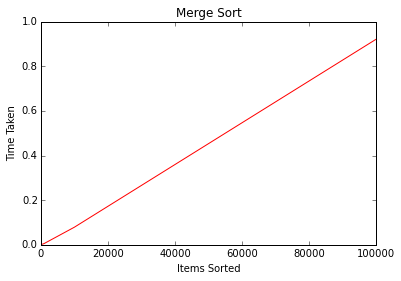

In [27]:

plt.plot([10,25,50,100,500,1000,10000,100000], [0.000,0.000,0.001,0.002,0.003,0.006,0.079,0.920], 'r')
plt.xlabel('Items Sorted')
plt.ylabel('Time Taken')
plt.title('Merge Sort')
plt.show()

# Note the these times were aquired witht the cProfiler library

Thought very hard to see, it you look at the time vs the items, you will see if is starting to show a growth slightly faster than n, suggesting n log n.

#    Insertion Sort:

Insertion sort, thought typically slower than merge sort has some distinct and useful advantages. Here is the code:

In [28]:
"""
insert_sort.py

    Homework for midterms
    
Logan Davis | March 10th, 2015
"""
def insert_sort(array):
    """
    A basic insertion sort. 
    Arguments (1):
        array = the list you with to have sorted.
    Returns (1):
        it returns a sorted version of array.
    ----------------------------------------------
    EXAMPLE:
    >>> array = [3,6,5,8,2,4556]
    >>> insertionsort(array)
    [2,3,5,6,8,4556]
    """
    ####
    # Some of this implementation was
    # Inspired by this source:
    # http://interactivepython.org/runestone/static/pythonds/SortSearch/TheInsertionSort.html
    ####
    for index in xrange(1,len(array)):
        current_index = index
        key = array [index]
        while (key < array[current_index-1]) and current_index > 0:
            array[current_index] = array[current_index-1]
            current_index = current_index-1
        array[current_index] = key
    return array

<h5> The Basic Idea </h5>
Here is how the insertion sort works:
    1. with the exception of the first item in the array, you compare each item in the array to the item in front of it
    2. If the item you are comparing is smaller, swap places.
    3. do this until the item in front of the one you are comparing is smaller then that which you have been comparing
    
Insertion is good because it is simple. It can be implemented in few lines, tends to have less bebugging, and is highly reusable in other algorithms. Some algorithms are based off Insertion sort, like Shell sort.



<h5> The Goods </h5>
Insertions is quite good on small collections or collections that are almost already sorted. It is very space effecient and quite quick to code. Using Insertin as a base, many other sorting algorithms can be constructed.

<h5> The Bads </h5>
This search is quite slow compared to Merge or Quick. is growth is O(n^2).


## Proof that it works:

In [29]:
"""
A test of insertion
"""
import random
my_randoms = random.sample(xrange(1000), 1000)
print "the randoms list is: \n {}".format(my_randoms)
print "sorted is: \n {}".format(insert_sort(my_randoms))


the randoms list is: 
 [469, 945, 439, 425, 73, 769, 54, 953, 385, 675, 651, 95, 995, 139, 558, 590, 919, 28, 811, 871, 4, 334, 686, 237, 3, 523, 57, 630, 47, 886, 247, 831, 446, 441, 455, 647, 881, 194, 619, 453, 958, 183, 966, 483, 366, 142, 200, 403, 922, 817, 173, 967, 627, 959, 592, 464, 553, 261, 567, 215, 901, 503, 460, 942, 837, 672, 815, 121, 416, 787, 298, 575, 41, 704, 69, 824, 287, 578, 271, 938, 687, 829, 282, 524, 694, 843, 767, 341, 94, 716, 762, 286, 907, 70, 496, 254, 625, 756, 118, 745, 502, 505, 743, 481, 309, 44, 803, 632, 266, 0, 412, 117, 862, 50, 228, 32, 856, 920, 82, 351, 354, 463, 124, 290, 708, 974, 155, 207, 165, 680, 535, 547, 97, 272, 949, 479, 319, 295, 328, 566, 7, 77, 609, 143, 587, 554, 347, 780, 527, 163, 394, 58, 29, 396, 317, 726, 816, 204, 60, 760, 184, 371, 494, 521, 955, 660, 768, 804, 5, 683, 599, 845, 302, 229, 179, 176, 572, 52, 581, 49, 268, 361, 383, 116, 212, 674, 757, 296, 358, 320, 852, 423, 147, 171, 222, 516, 937, 312, 329, 690, 741, 45

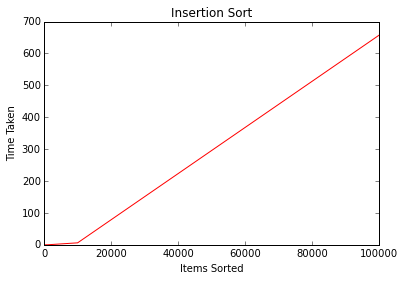

In [30]:
plt.plot([10,25,50,100,500,1000,10000,100000], [0.000,0.000,0.000,0.002,0.030,0.076,6.171,657.133], 'r')
plt.xlabel('Items Sorted')
plt.ylabel('Time Taken')
plt.title('Insertion Sort')
plt.show()

# Note the these times were aquired witht the cProfiler library

Yet again, it seems that my data points are not close enough to show the perfect curve of growth, but the only way to distribe the shirt in after 1000 items is exponential. 

The reason I stopped both tests at 100000 is due to insertion sort taking a so long to do it, I didn't imagine any further test would be needed.